C:\Users\rabindra_singh_negi\Desktop\RaSiNe64\Learning\Energy Forecast Optimization with XGBoost\src
Presence of any outliers in each numerical columns


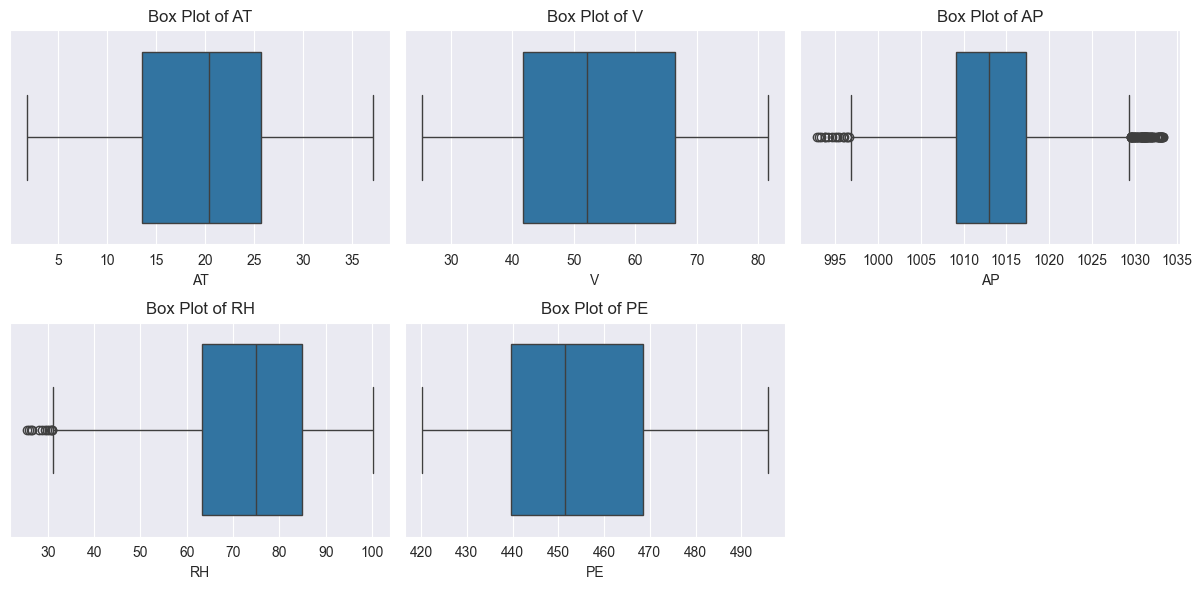

C:\Users\rabindra_singh_negi\AppData\Local\Temp\ipykernel_17708\1913814391.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(data=dataset, x=dataset['AP'], ax=axes[0], palette="plasma")
C:\Users\rabindra_singh_negi\AppData\Local\Temp\ipykernel_17708\1913814391.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(data=dataset, x=dataset['RH'], ax=axes[1], palette="viridis")


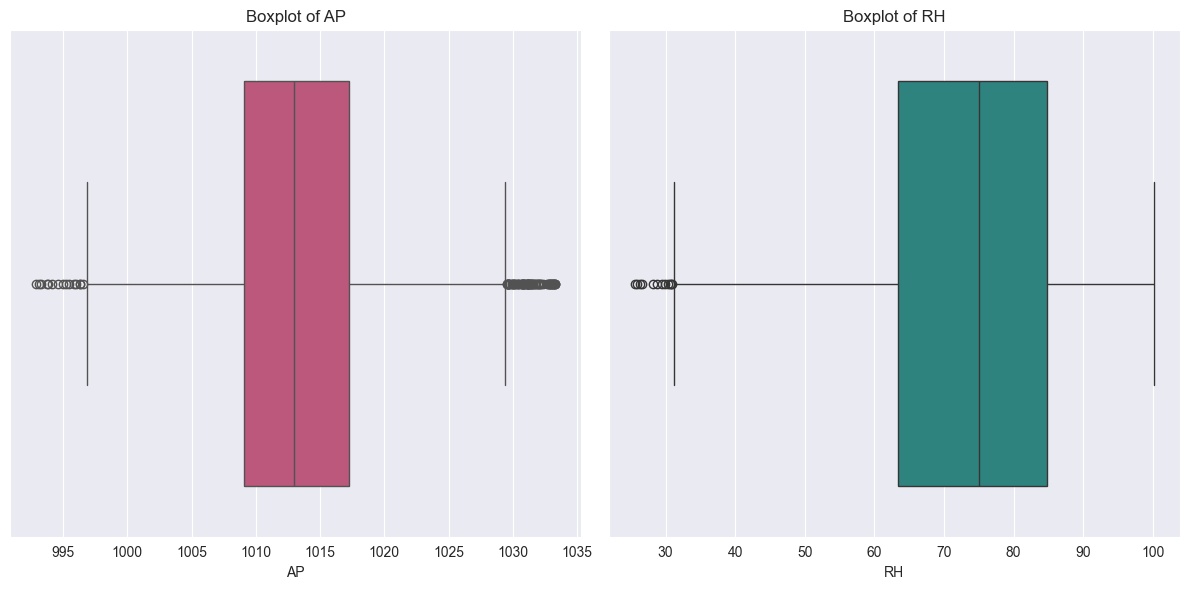

AP Outlier Range: 996.8600000000001 to 1029.5
RH Outlier Range: 31.073750000000004 to 117.08375
Original data shape: (9568, 5)
Cleaned data shape: (9468, 5)


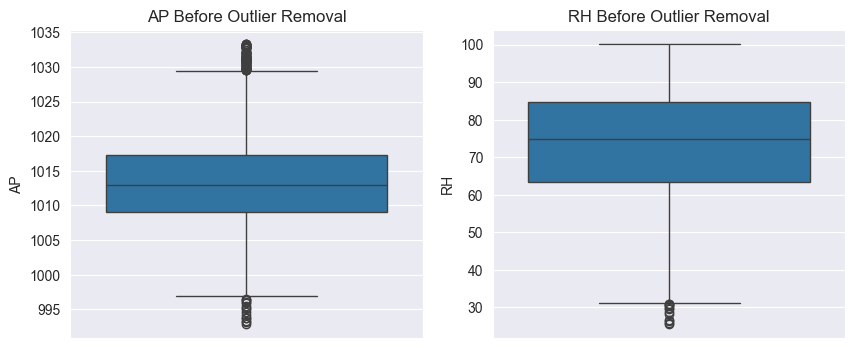

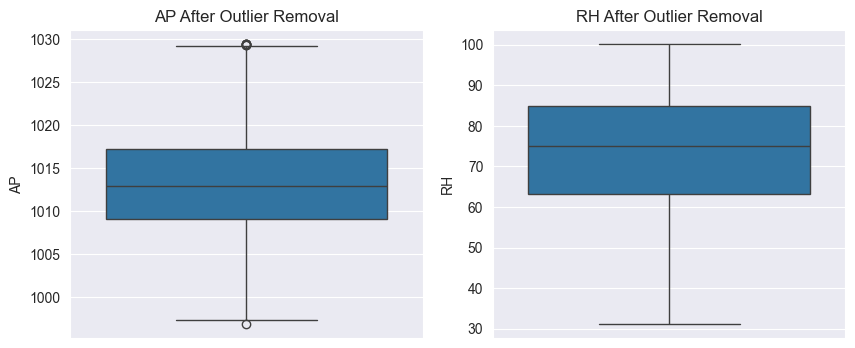

C:\Users\rabindra_singh_negi\AppData\Local\Temp\ipykernel_17708\1913814391.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_dataset.rename(columns={


shape of X train: (7574, 4) and shape of X test (1894, 4)
Scaled X_train sample:
[[ 1.55625671  1.02584692  0.12611178 -2.4225818 ]
 [ 1.55895477  1.22690689 -1.08604928 -0.3578885 ]
 [-0.23794776 -0.17108821 -1.14910968  1.83796217]
 [ 1.21630218  1.26146407 -0.7602372  -1.84963113]
 [-1.09727727 -0.83160162 -0.09284794 -0.06589076]]
Scaled X_test sample:
[[ 0.89118693  1.26146407 -1.08780095  0.3331038 ]
 [-0.82747209 -0.85751951 -0.0805862   0.93711805]
 [ 0.16676002  0.43523326  0.65687017  0.10944595]
 [-0.21501432  0.62843933 -0.23123049  1.092436  ]
 [ 0.52290286 -0.40042223 -1.84102242 -0.22396992]]


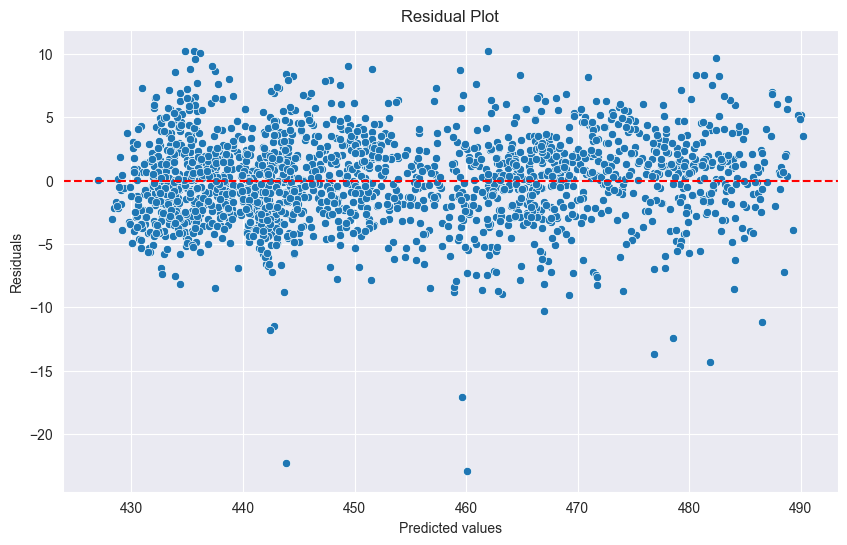

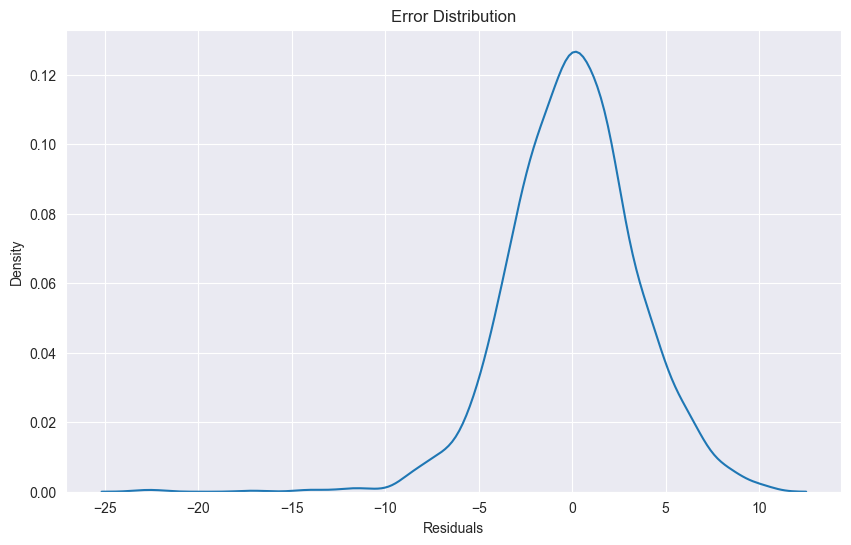

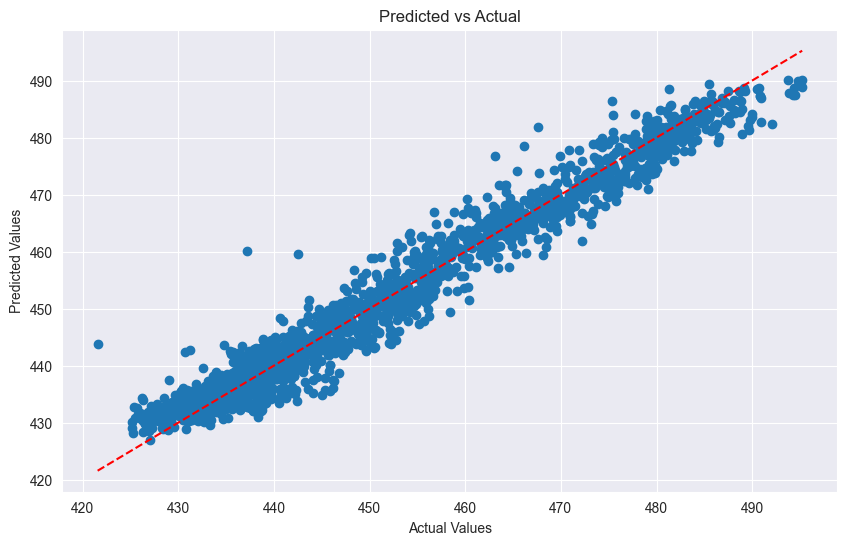

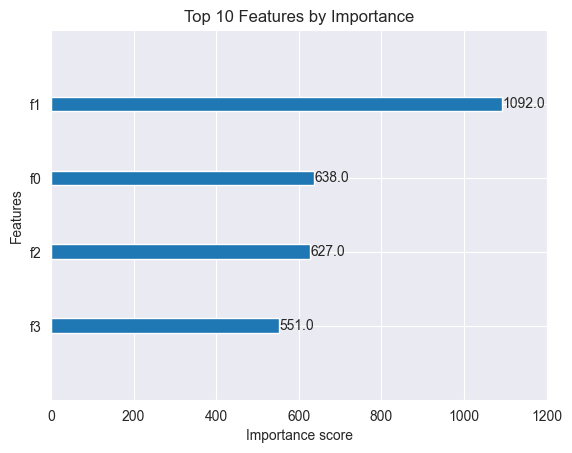

Mean Absolute Error: 2.6003
Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}
Best Model MAE: 2.1171
Train MAE: 0.9459
Test MAE: 2.1171
Cross-validation MAE scores: [2.17009003 2.27355547 2.2445737  2.22343795 2.29254565]
Mean MAE: 2.2408
Standard Deviation: 0.0426
Final Model Evaluation:
• Train MAE: 0.9459
• Test MAE: 2.1171
• CV Mean MAE: 2.2408
• CV Std Dev: 0.0426


In [1]:
# Combined Notebook: Data Preprocessing & XGBoost Model Building

## Section 1: Importing Libraries and Loading Dataset

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as pt
import os

!pip install openpyxl
!pip install xgboost

print(os.getcwd())
dataset = pd.read_excel("../data/Folds5x2_pp.xlsx")

## Section 2: Feature Engineering (original code preserved)

# (You suggested creating AT × V, commented out; remains commented)
# dataset['AT_V'] = dataset['AT'] * dataset['V']
# dataset.head()
# dataset.drop('AT_V', axis=1)

## Section 3: Outlier Detection / Visualization

# Boxplots
print("Presence of any outliers in each numerical columns")
pt.figure(figsize=(12, 6))
for i, col in enumerate(dataset.columns):
    pt.subplot(2, 3, i + 1)
    sb.boxplot(x=dataset[col])
    pt.title(f'Box Plot of {col}')
pt.tight_layout()
pt.show()

# AP & RH zoomed-in boxplots
fig, axes = pt.subplots(1, 2, figsize=(12, 6))
sb.boxplot(data=dataset, x=dataset['AP'], ax=axes[0], palette="plasma")
axes[0].set_title("Boxplot of AP")
sb.boxplot(data=dataset, x=dataset['RH'], ax=axes[1], palette="viridis")
axes[1].set_title("Boxplot of RH")
pt.tight_layout()
pt.show()

## Section 4: Remove Outliers using IQR in AP and RH

# Compute IQR bounds
Q1ap = dataset['AP'].quantile(0.25)
Q3ap = dataset['AP'].quantile(0.75)
IQRap = Q3ap - Q1ap

Q1rh = dataset['RH'].quantile(0.25)
Q3rh = dataset['RH'].quantile(0.75)
IQRrh = Q3rh - Q1rh

lower_bound_ap = Q1ap - 1.5 * IQRap
upper_bound_ap = Q3ap + 1.5 * IQRap
lower_bound_rh = Q1rh - 1.5 * IQRrh
upper_bound_rh = Q3rh + 1.5 * IQRrh

print(f"AP Outlier Range: {lower_bound_ap} to {upper_bound_ap}")
print(f"RH Outlier Range: {lower_bound_rh} to {upper_bound_rh}")

# Filter dataset
clean_dataset = dataset[
    (dataset['AP'] >= lower_bound_ap) & (dataset['AP'] <= upper_bound_ap) &
    (dataset['RH'] >= lower_bound_rh) & (dataset['RH'] <= upper_bound_rh)
    ]

print(f"Original data shape: {dataset.shape}")
print(f"Cleaned data shape: {clean_dataset.shape}")

# Before vs After plots
pt.figure(figsize=(10, 4))
pt.subplot(1, 2, 1)
sb.boxplot(dataset['AP'])
pt.title('AP Before Outlier Removal')
pt.subplot(1, 2, 2)
sb.boxplot(dataset['RH'])
pt.title('RH Before Outlier Removal')
pt.show()

pt.figure(figsize=(10, 4))
pt.subplot(1, 2, 1)
sb.boxplot(clean_dataset['AP'])
pt.title('AP After Outlier Removal')
pt.subplot(1, 2, 2)
sb.boxplot(clean_dataset['RH'])
pt.title('RH After Outlier Removal')
pt.show()

## Section 5: Rename Columns and Define Features/Target

clean_dataset.rename(columns={
    'AT': 'Temperature',
    'V': 'Exhaust Vacuum',
    'AP': 'Ambient Pressure',
    'RH': 'Relative Humidity',
    'PE': 'Electrical energy output'
}, inplace=True)

features = ['Temperature', 'Exhaust Vacuum', 'Ambient Pressure', 'Relative Humidity']
X = clean_dataset[features].values
y = clean_dataset['Electrical energy output'].values

## Section 6: Train-Test Split and Feature Scaling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"shape of X train: {X_train.shape} and shape of X test {X_test.shape}")

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print("Scaled X_train sample:")
print(X_train[:5])
print("Scaled X_test sample:")
print(X_test[:5])

## Section 7: XGBoost — Initial Model, Training & Predictions

import xgboost as xgb

xgbmodel = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)

xgbmodel.fit(X_train, y_train)
y_pred = xgbmodel.predict(X_test)

## Section 8: Model Evaluation — Residuals and Error Visualization

residuals = y_test - y_pred

pt.figure(figsize=(10, 6))
sb.scatterplot(x=y_pred, y=residuals)
pt.axhline(y=0, color='r', linestyle='--')
pt.xlabel('Predicted values')
pt.ylabel('Residuals')
pt.title('Residual Plot')
pt.show()

pt.figure(figsize=(10, 6))
sb.kdeplot(residuals)
pt.xlabel('Residuals')
pt.title('Error Distribution')
pt.show()

pt.figure(figsize=(10, 6))
pt.scatter(y_test, y_pred)
pt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
pt.xlabel('Actual Values')
pt.ylabel('Predicted Values')
pt.title('Predicted vs Actual')
pt.show()

from xgboost import plot_importance

plot_importance(xgbmodel, importance_type='weight', max_num_features=10)
pt.title('Top 10 Features by Importance')
pt.show()

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")

## Section 9: Hyperparameter Tuning with GridSearchCV

from sklearn.model_selection import GridSearchCV

p_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

grid_search = GridSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid=p_grid,
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

## Section 10: Evaluate Best Model

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
mae_best = mean_absolute_error(y_test, y_pred_best)
print(f"Best Model MAE: {mae_best:.4f}")

# Retrain with best params
best_xgbmodel = xgb.XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=best_model.colsample_bytree,
    learning_rate=best_model.learning_rate,
    max_depth=best_model.max_depth,
    min_child_weight=best_model.min_child_weight,
    n_estimators=best_model.n_estimators,
    subsample=best_model.subsample,
    random_state=42
)

best_xgbmodel.fit(X_train, y_train)

train_predictions = best_xgbmodel.predict(X_train)
test_predictions = best_xgbmodel.predict(X_test)

train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

print(f"Train MAE: {train_mae:.4f}")
print(f"Test MAE: {test_mae:.4f}")

## Section 11: Cross‑Validation Performance

from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_absolute_error
from xgboost import XGBRegressor

best_xgbmodel2 = XGBRegressor(
    colsample_bytree=best_model.colsample_bytree,
    learning_rate=best_model.learning_rate,
    max_depth=best_model.max_depth,
    min_child_weight=best_model.min_child_weight,
    n_estimators=best_model.n_estimators,
    subsample=best_model.subsample
)

mae_scorer = make_scorer(mean_absolute_error)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_results = cross_val_score(best_xgbmodel2, X_train, y_train, cv=kf, scoring=mae_scorer)
print(f"Cross-validation MAE scores: {cv_results}")
print(f"Mean MAE: {cv_results.mean():.4f}")
print(f"Standard Deviation: {cv_results.std():.4f}")

## Section 12: Summary of Results

print("Final Model Evaluation:")
print(f"• Train MAE: {train_mae:.4f}")
print(f"• Test MAE: {test_mae:.4f}")
print(f"• CV Mean MAE: {cv_results.mean():.4f}")
print(f"• CV Std Dev: {cv_results.std():.4f}")
